In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
# import matplotlib as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import glob as gb
from keras.utils import np_utils

### training information

In [2]:
def get_images(path, folder):
  labels = os.listdir(folder)[:62]
  data = []
  for label in labels:
    images = gb.glob(pathname=str(path + label + '/*.ppm'))
    class_num = labels.index(label)

    #************* Just for Tracing **********
    # image_array = cv.imread(images[0][0])
    # resized_img = cv.resize(image_array, (32, 32), interpolation=cv.INTER_AREA)   
    # cv.imshow('image', resized_img)
    # cv.waitKey(0)
    #*****************************************

    for image in images:
      image_array = cv.imread(f'{image}', cv.IMREAD_GRAYSCALE)
      resized_img = cv.resize(image_array, (32, 32), interpolation=cv.INTER_AREA)     
      data.append([resized_img, class_num])
  return data

In [3]:
train = get_images('Training/','Training')
test = get_images('Testing/','Testing')

def get_x_y(data):
  x, y = [], []
  for feature, label in data:
    x.append(feature)
    y.append(label)
  return x, y


In [4]:
x_train, y_train = get_x_y(train)
x_test, y_test = get_x_y(test)

In [5]:
x_train

[array([[ 42,  44,  50, ..., 131, 129, 128],
        [ 32,  35,  42, ..., 130, 126, 132],
        [ 33,  32,  28, ..., 152, 159, 164],
        ...,
        [160, 127,  86, ..., 118, 180, 199],
        [171, 125,  92, ...,  48, 137, 213],
        [122,  43,  38, ...,  44, 118, 209]], dtype=uint8),
 array([[ 52,  56,  45, ..., 114, 129, 127],
        [ 52,  50,  46, ..., 121, 132, 144],
        [ 52,  48,  44, ..., 167, 182, 186],
        ...,
        [ 82,  83,  67, ...,  73,  97,  99],
        [102, 118,  64, ...,  50,  99, 113],
        [115,  44,  34, ...,  47, 102, 125]], dtype=uint8),
 array([[ 57,  65,  62, ...,  73,  60,  49],
        [ 64,  64,  58, ...,  81,  60,  46],
        [ 68,  61,  53, ...,  80,  59,  44],
        ...,
        [157, 120,  89, ...,  77,  89,  85],
        [148, 107,  97, ...,  93,  92,  94],
        [128, 115, 107, ...,  87,  96,  95]], dtype=uint8),
 array([[ 62,  57,  52, ...,  46,  41,  45],
        [ 65,  60,  52, ...,  41,  40,  44],
        [ 61,  6

In [6]:
x_train = np.array(x_train) / 255
y_train = np.array(y_train)

In [7]:
x_test = np.array(x_test) / 255
y_test = np.array(y_test)

In [8]:
print(x_train.shape)
print(x_test.shape)

(4675, 32, 32)
(2520, 32, 32)


In [9]:
x_train = x_train.reshape(-1, 32, 32, 1)
x_train.shape

(4675, 32, 32, 1)

In [10]:
x_test = x_test.reshape(-1, 32, 32, 1)
x_test.shape

(2520, 32, 32, 1)

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(62, activation='softmax'))


In [13]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
callback = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy')]

In [24]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.05, validation_batch_size=8, batch_size=32, callbacks=callback)

Epoch 1/100
139/139 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.9117 - val_loss: 1.1779 - val_accuracy: 0.7949
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.9214 - val_loss: 1.5881 - val_accuracy: 0.7393
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.9266 - val_loss: 1.8150 - val_accuracy: 0.7179
Epoch 4/100
139/139 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.9288 - val_loss: 1.7471 - val_accuracy: 0.7479
Epoch 5/100
139/139 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9291 - val_loss: 1.3302 - val_accuracy: 0.7778
Epoch 6/100
139/139 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.9410 - val_loss: 1.3638 - val_accuracy: 0.7692


In [25]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

147/147 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9465
Loss = 0.221
Accuracy = 94.65 %


In [26]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

79/79 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8754
Loss = 0.548
Accuracy = 87.54 %


### visualization

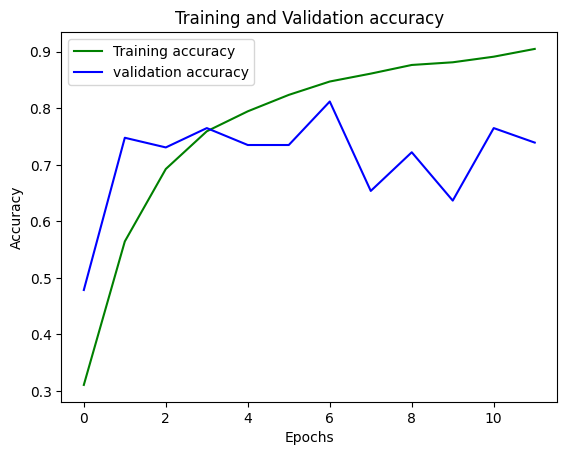

In [18]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

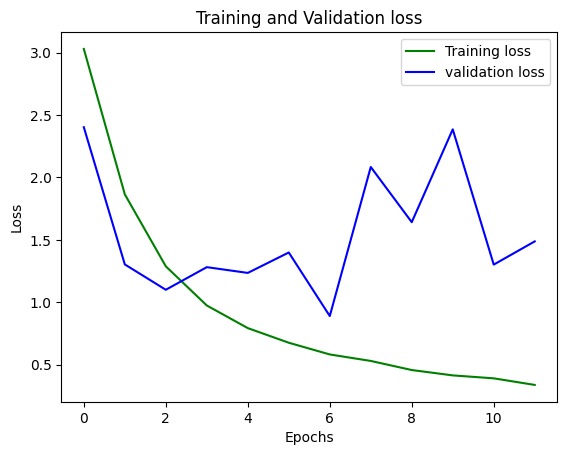

In [19]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)

79/79 [==============================] - 0s 1ms/step


In [21]:
confusion_matrix(y_test.argmax(-1) ,pred.argmax(-1))

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ...,  0,  6,  1],
       [ 0,  0,  0, ...,  0,  0, 94]], dtype=int64)

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

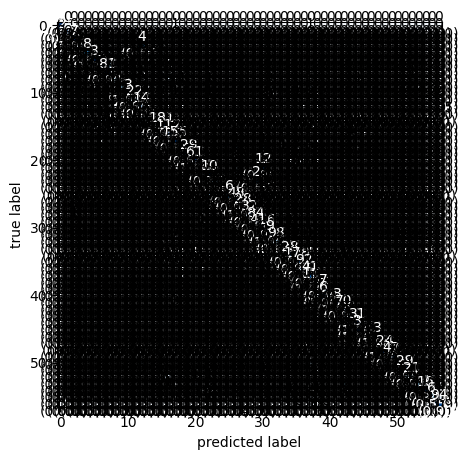

In [22]:
cm = confusion_matrix(y_test.argmax(-1) ,pred.argmax(-1))
# plot confusion matrix
plot_confusion_matrix(conf_mat = cm,figsize=(5,5),
                     show_normed = True)

In [30]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test.argmax(-1) ,pred.argmax(-1))
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')

plt.xlabel('(1-Specificity) - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported